In [62]:
letter="b"
band="k"

import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture
import math


magzp=[20.9044,20.4871,19.9757]


if band == "j":
    MAGZP=magzp[0]
    #ChosenBandCorrectionFactor=bandCorrectionFactor[0]*bandFrequency[0]
elif band == "h":
    MAGZP=magzp[1]
    #ChosenBandCorrectionFactor=bandCorrectionFactor[1]*bandFrequency[1]
elif band == "k":
    MAGZP=magzp[2]
    #ChosenBandCorrectionFactor=bandCorrectionFactor[2]*bandFrequency[2]
    
    
cycle=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
GalAPetRad=[12.9,5.5,12.3,12.8,11.9,13.2,16.8,20.6,24.4,49.6,70.7,69.3,14.3,17.6,31.1,13.1,25.6]
GalAInc=[47,28,35,43,26,55,49,68,50,68,60,67,46,65,58,35,60] #Checked
GalAPA=[65,135,0,60,90,100,60,30,5,60,150,85,35,60,120,30,140]
GalAPixCentreXVal=[26,29,29.5,26,75,26,32,26,25.5,81,151,126,29,26,51,28,26]  #Checked
GalAPixCentreYVal=[26,22,29,26,98,26,22,26,25.5,247,151,126,28,26,51,27,26]   #Checked
GalAMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalAMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

GalBPetRad=[10.3,12.2,11.9,10.3,14.0,16.2,15.3,17.1,19.1,156.4,156.4,156.4,4.8,17.1,14.2,23.7,12.3]
GalBInc=[50,41,17,50,25,57,34,58,41,79,79,79,49,58,23,50,45]
GalBPA=[0,30,0,0,0,150,80,145,40,55,55,55,25,145,140,45,135] 
GalBPixCentreXVal=[26,26,26,20,26,26,26,26,26,100,100,100,50,26,26,26,68]   #Checked
GalBPixCentreYVal=[26,26,26,19,26,26,26,26,26,258,258,258,28,26,26,26,45]  #Checked
GalBMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in cycle:
    GalAMajAxis[i-1]=(GalAPetRad[i-1]/2)  #Multiplying by 2 for 2*PR then dividing by 2  for 2" per pixel cancels out
    GalAMinAxis[i-1]=GalAMajAxis[i-1]*(cos((((GalAInc[i-1])*np.pi)/180)))
    GalBMajAxis[i-1]=(GalBPetRad[i-1]/2)  #Multiplying by 2 for 2*PR then dividing by 2  for 2" per pixel cancels out
    GalBMinAxis[i-1]=GalBMajAxis[i-1]*(cos((((GalBInc[i-1])*np.pi)/180)))
    
#print(GalAMajAxis)
#print(GalAMinAxis)

image_dataMin = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value
image_dataPix = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each picture
image_dataAve = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in picture
image_dataMinAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value in aperture
image_dataPixAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each aperture
image_dataAveAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in aperture
arrmgePic =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
photsum = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
tot_table=[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]

#Finding background locally

#for i in cycle:
#    print(GalAPixCentreXVal[i-1], GalAPixCentreYVal[i-1], GalAPetRad[i-1])
#    print(GalBPixCentreXVal[i-1], GalBPixCentreYVal[i-1], GalBPetRad[i-1])
#    print()

Need to change the correction factors and possibly the major axis lengths?


Also need to check which of 12a and 13a are wrong. 

In [63]:
#Finding background locally

Backgroundlevels=[]

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/%d%c/%d%c%c.fits' % (i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    #print("minimum value", i, np.min(image_data))
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    b=1
    
    if letter == 'a':
        
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        toprangeA=GalAMajAxis[i-1]+(2*ratioA)
        rad=ratioA
        
        while rad < toprangeA:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            #image_dataAve[i-1] =Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioA
            b=b+1
            if rad > toprangeA:
                a_in=rad-ratioA
                a_out=rad
                annulus_apertures = EllipticalAnnulus(position, a_in=a_in, a_out=a_out, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                data = image_data
                phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))
    
    else:
        
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+(2*ratioB)
        #print("Stop before major axis is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+2)
        
        rad=ratioB
        
        while rad < toprangeB:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioB
            b=b+1
            if rad > toprangeB:
                a_in=rad-ratioB
                a_out=rad
                annulus_apertures = EllipticalAnnulus(position, a_in=a_in, a_out=a_out, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                data = image_data
                phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))
  
    
print("background levels:", Backgroundlevels)

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_sin

background levels: [581.51470150867169, 509.6227353288682, 560.38371258875566, 581.51470150867169, 408.66438745622253, 535.15533581143575, 616.76426612142563, 449.78033173281761, 614.82566075589682, 449.83405877992271, 449.83405877992271, 449.83405877992271, 591.61426205938142, 449.78033173281761, 205.16942301313347, 635.13021177045528, 657.05683390876004]


Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


In [64]:
#Graphs of Flux per pixel vs radius
FluxPerPixelInLargestAperture=[]

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/%d%c/%d%c%c.fits' % (i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
   
    RadArray=[]
    FluxAtRad=[]
    b=1
    
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        toprangeA=GalAMajAxis[i-1]+ratioA
        #print("Stop before major is:",  toprangeA)
        #print("Stop before minor is:", GalAMinAxis[i-1]+1)
        
        rad=ratioA
        
        while rad < toprangeA:
            
            #print("major is:", rad)
            #print("minor is:", b)
            #print( )
            
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            
            S=((phot_table[0][0]/(apertures.area()))-Backgroundlevels[i-1])
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            #print(-S3)
            S4=S3/2.5
            F=10**(S4)
            FluxAtRad.append(F)    #Subtracts the background level
            
            RadArray.append(b)
            rad=rad+ratioA
            b=b+1
            
            #print(phot_table[0][0])
            #print(apertures.area())
        #print(RadArray)
        #print(FluxAtRad)
    
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+ratioB
        #print("Stop before major is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+1)
        
        rad=ratioB
        
        while rad < toprangeB:
            
            #print("major is:", rad)
            #print("minor is:", b)
            #print( )
                        
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            
            S=((phot_table[0][0]/(apertures.area()))-Backgroundlevels[i-1])
            if S<0:
                S=1e-10
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            #print(-S3)
            S4=S3/2.5
            F=10**(S4)
            FluxAtRad.append(F)    #Subtracts the background level
            
            
            
            RadArray.append(b)
            rad=rad+ratioB
            b=b+1
        
        #print(RadArray)
        #print(FluxAtRad[-1])
    FluxPerPixelInLargestAperture.append(FluxAtRad[-1])
    
    #print("This is galaxy:", i)
    #plt.figure(1)
    #y1 = FluxAtRad
    #x = RadArray
    ##plt.errorbar(x, y1, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    #line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    #plt.suptitle('Flux per pixel as a funtion of Minor axis length')
    #plt.xlabel('Minor axis length (Pixels)')
    #plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    #labels=RadArray
    #plt.show()

print(FluxPerPixelInLargestAperture)

[1.488194856206364e-07, 1.198617191593691e-07, 1.8077744247298129e-07, 1.488194856206364e-07, 4.2220139173502726e-08, 7.249620842691689e-08, 3.592014800342965e-08, 4.312365464042155e-08, 1.397427020670333e-07, 5.877020343170677e-08, 5.877020343170677e-08, 5.877020343170677e-08, 3.233808792784394e-08, 4.312365464042155e-08, 2.0016521632375e-07, 1.1490279014211503e-07, 6.485793101213386e-08]


Something wrong with 2a as the flux total goes down

In [56]:
#Graphs of Total Flux vs radius
FluxPerPixelArray=[]
EffRadArray=[]
for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/%d%c/%d%c%c.fits' % (i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    
    RadArray=[]
    FluxAtRad=[]
    b=1
    
    if letter == 'a':                                     #A galaxies
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        toprangeA=GalAMajAxis[i-1]+ratioA
        rad=ratioA
                     
        while rad < toprangeA:
                        
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            
            S=(phot_table[0][0]-((a)*Backgroundlevels[i-1]))
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            #print(-S3)
            S4=S3/2.5
            F=10**(S4)
            FluxAtRad.append(F)  #Subtracts the background level
            RadArray.append(b)
            rad=rad+ratioA
            b=b+1
        
    else:                                                   #B galaxies
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        toprangeB=GalBMajAxis[i-1]+ratioB
        rad=ratioB
        while rad < toprangeB:
                                  
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            
            S=(phot_table[0][0]-((a)*Backgroundlevels[i-1]))
            if S<0:
                S=1e-10
            
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            #print(-S3)
            S4=S3/2.5
            F=10**(S4)
            FluxAtRad.append(F)   
            RadArray.append(b)
            rad=rad+ratioB
            b=b+1
    
    fit=0                                       #Polynomial Fitting
    fit=np.polyfit(RadArray, FluxAtRad, 12)
    effrad=1e-5
    answer=0
    while answer <= ((FluxAtRad[-1])/2):
        answer = ((fit[0]*(effrad**12))+(fit[1]*(effrad**11))+(fit[2]*(effrad**10))+(fit[3]*(effrad**9))+(fit[4]*(effrad**8))+(fit[5]*(effrad**7))+(fit[6]*(effrad**6))+(fit[7]*(effrad**5))+(fit[8]*(effrad**4))+(fit[9]*(effrad**3))+(fit[10]*(effrad**2))+(fit[11]*(effrad**1))+(fit[12]))
        effrad=effrad+1e-5
    EffRadArray.append(effrad)
    FluxPerPixelArray.append((FluxAtRad[-1]))
    
    #print("This is galaxy:", i)
    #plt.figure(1)
    #y1 = FluxAtRad
    #x=RadArray
    ##plt.errorbar(x, y5A, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    #line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    #plt.suptitle('Total Flux as a funtion of radius from centre of galaxy')
    #plt.xlabel('Semi-Minor axis radius (Pixels)')
    #plt.ylabel('Total aperture Flux (Intensity (10^-26Wm^-1)), background removed (Min value)')
    #plt.show()
    
print(EffRadArray)

/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
/home/lb576/anaconda3/envs/astroconda/lib/python3.5/site-packages/numpy/lib/polynomial.py:595: RankWarning: Polyfit may 

[1.574420000001847, 2.2922600000065496, 2.701070000009228, 1.574420000001847, 3.333060000013368, 2.368800000007051, 3.0058400000112244, 2.5213500000080504, 3.2108500000125675, 6.1653299999357625, 6.1653299999357625, 6.1653299999357625, 1.8179300000034422, 2.5213500000080504, 2.9288800000107202, 2.84185000001015, 2.4333100000074737]


72.2760218694
164.069072688
113.964241732
83.1216489352
50.4285126202
This is galaxy: 1


Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


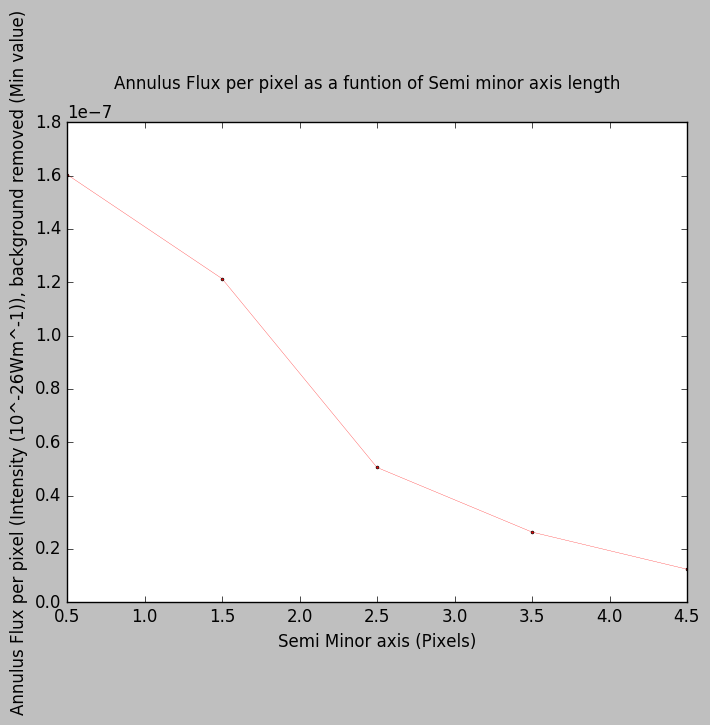

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


43.3348826769
46.6011040243
194.318505792
This is galaxy: 2


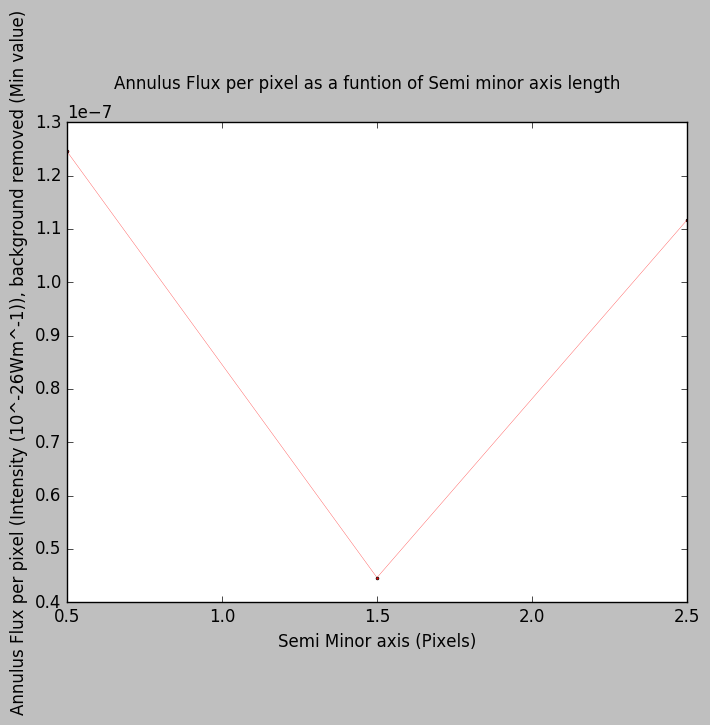

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


322.743681783
831.957133606
925.671641337
641.761311117
308.318692383
181.952436869
This is galaxy: 3


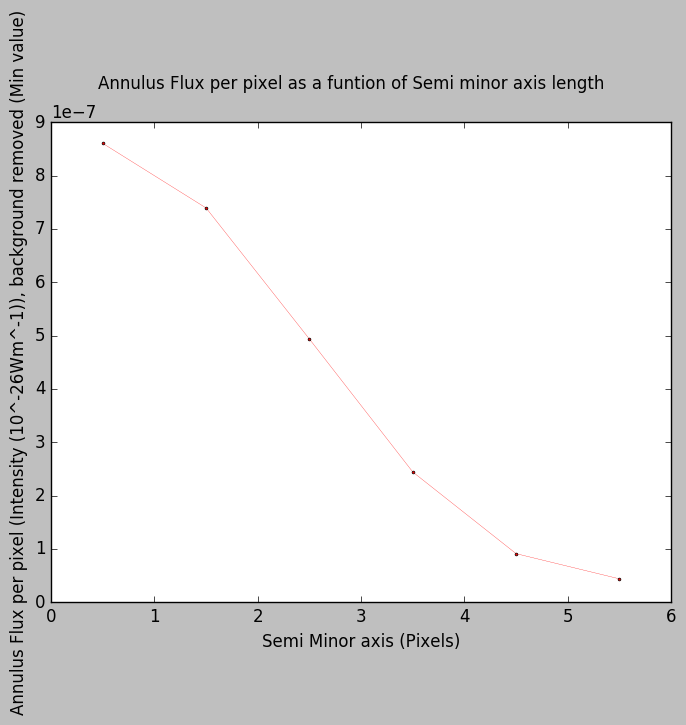

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


130.191319204
288.433410128
170.859727126
58.280808528
70.6288027719
This is galaxy: 4


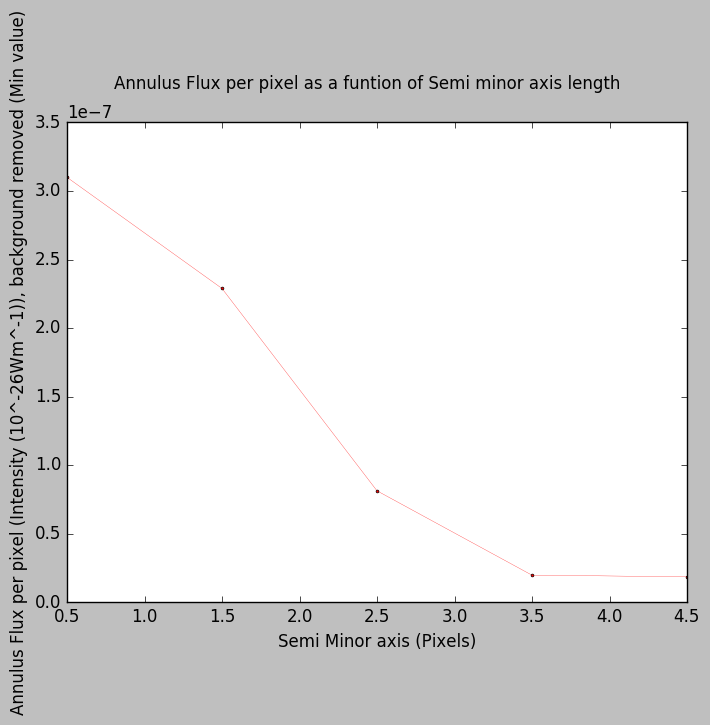

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


65.6394677327
204.583483154
132.130693461
65.9644891561
39.3572756348
24.6016664225
This is galaxy: 5


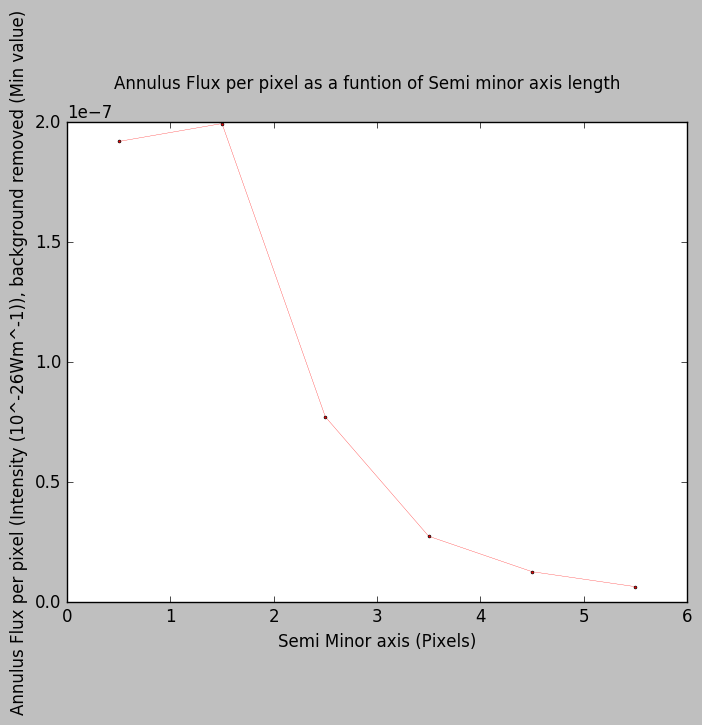

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


261.658288352
509.247639105
298.368497425
94.9561764249
This is galaxy: 6


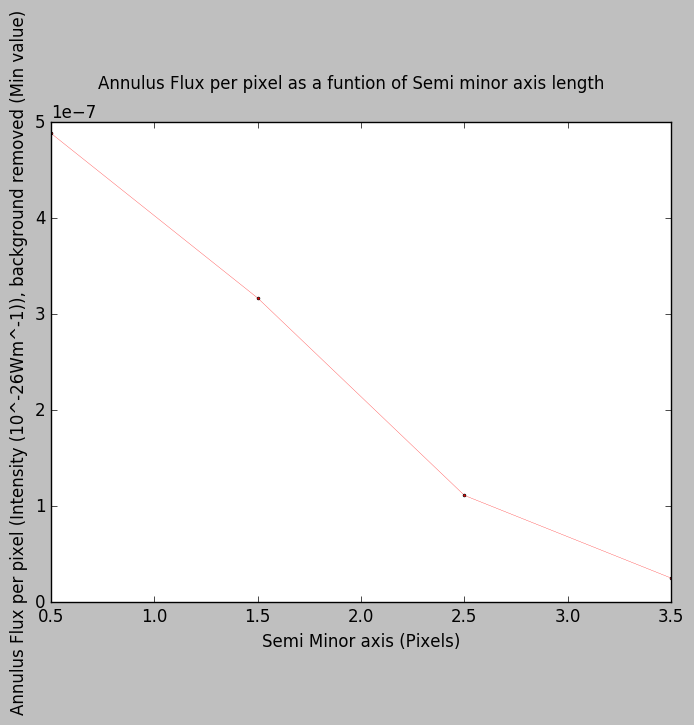

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


114.77186263
351.745018738
252.139405619
186.736891256
151.356658386
86.6734283854
This is galaxy: 7


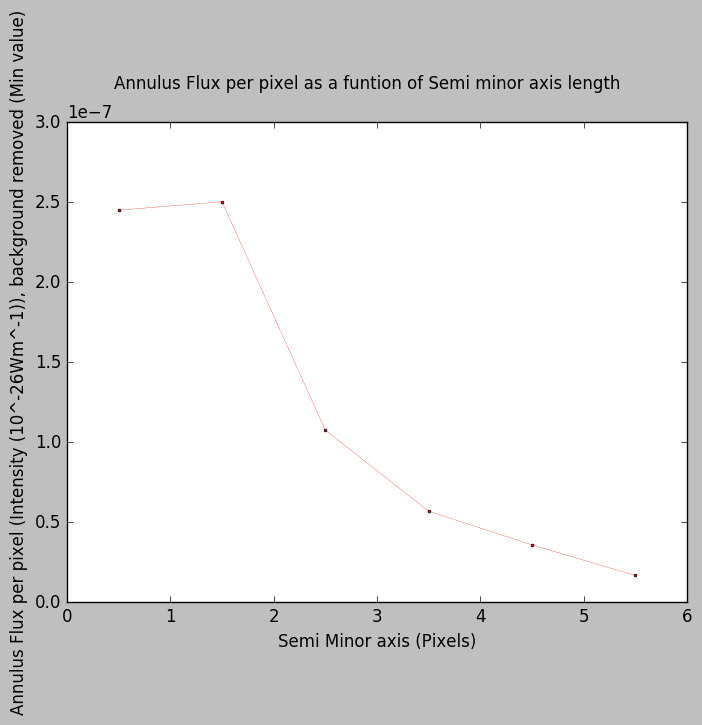

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


188.027167913
331.773209062
264.778633756
155.559331887
This is galaxy: 8


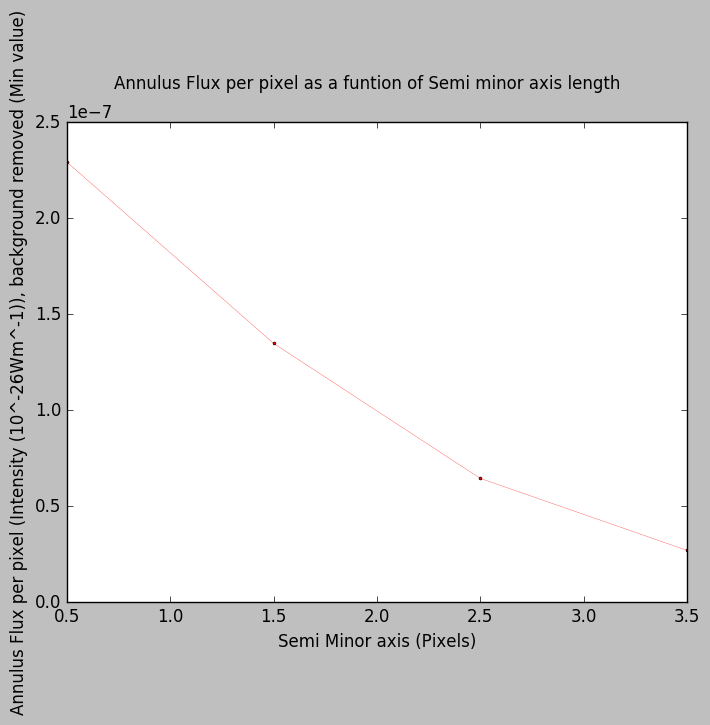

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


347.84323239
837.671900538
770.180607139
521.596550678
366.901215531
168.649152479
205.645923044
129.226073127
This is galaxy: 9


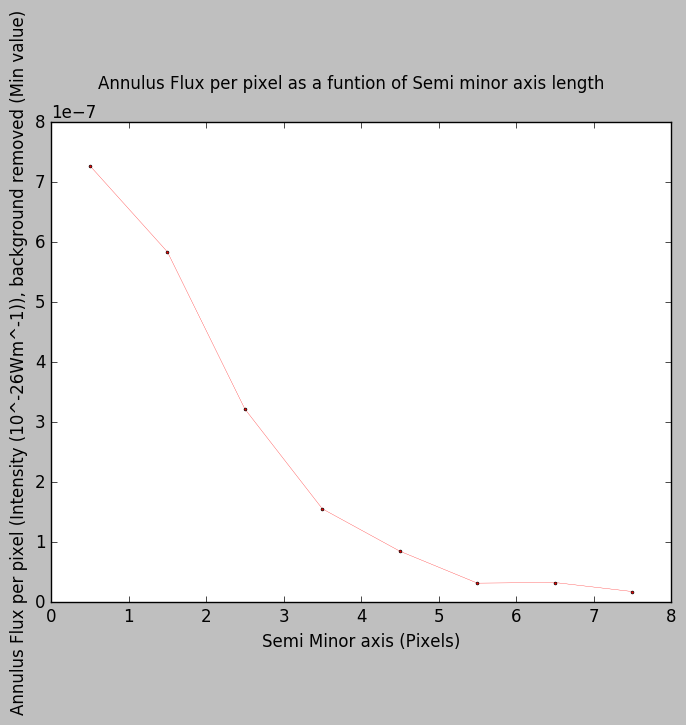

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


954.200178846
1637.4864716
1372.28993476
1043.39860788
748.194768186
647.488972314
670.082658864
545.83939351
374.419786297
261.548820442
This is galaxy: 10


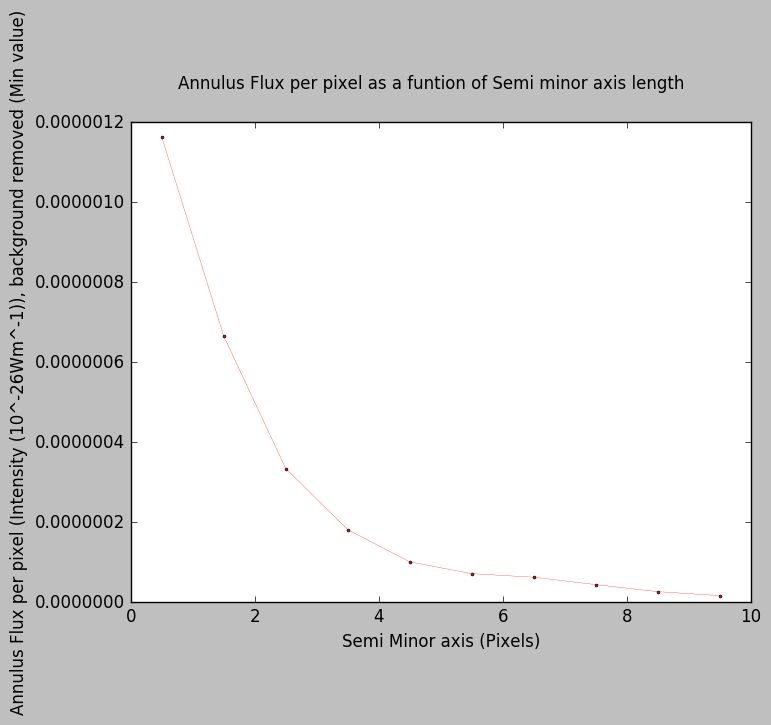

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


505.540990569
1072.87051504
1253.97110153
1101.98821511
917.127522912
805.659968528
791.341437581
585.127278583
571.238729937
433.226585099
421.612555495
342.327327771
391.708764476
42.8934464205
454.966954659
178.849422858
413.620440862
28.1076118195
This is galaxy: 11


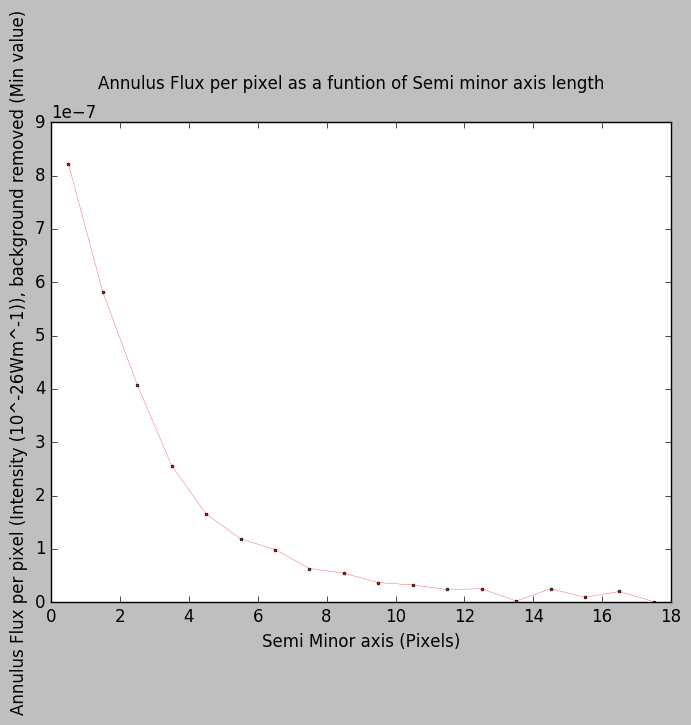

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


1141.28134019
2119.66109883
1872.78222465
1563.51842677
1088.20988645
844.370332346
869.028796426
1103.40002601
600.117597755
676.297385077
500.22774735
560.916468388
817.164351413
530.056866396
This is galaxy: 12


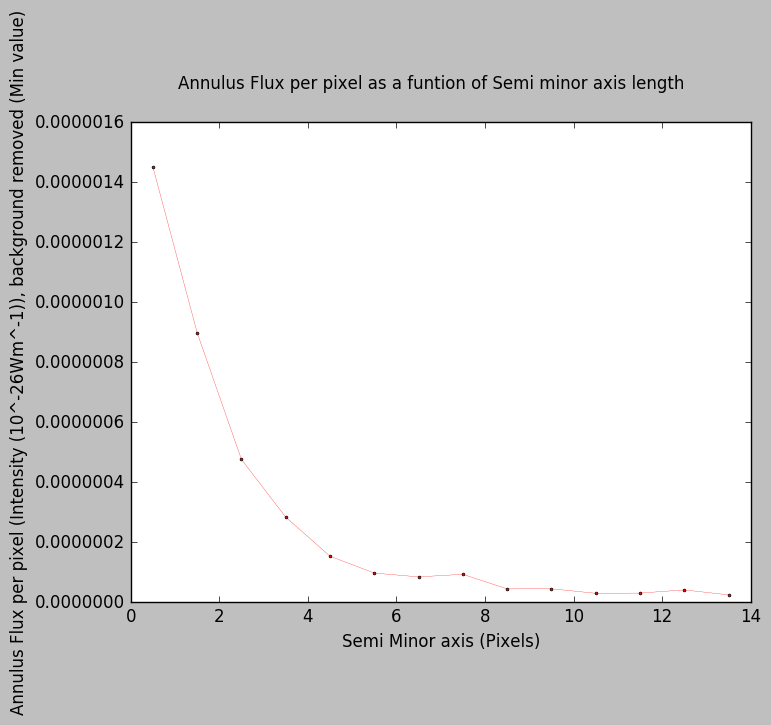

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


120.687933256
196.024327111
233.547661884
72.136336623
136.933575815
This is galaxy: 13


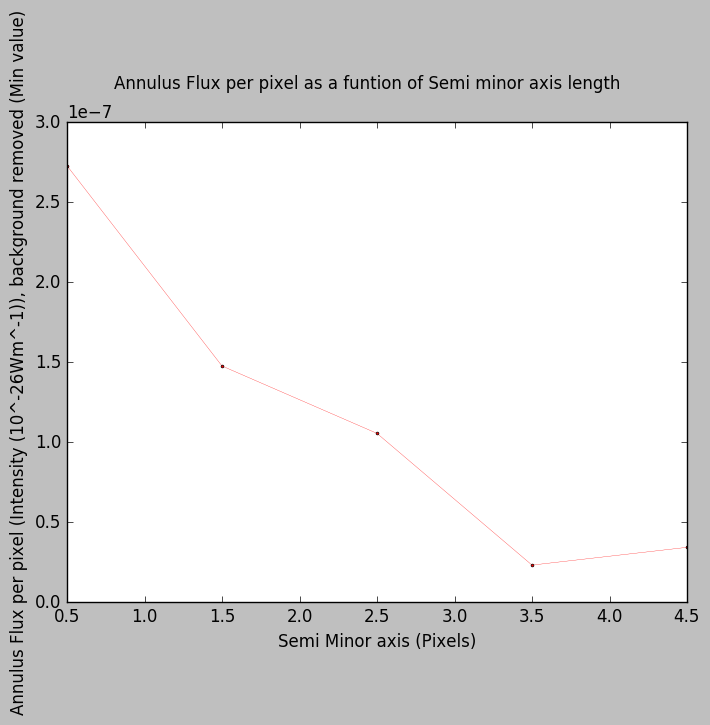

268.927445374
377.329914246
243.977416687
-32.5795251465


Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


ValueError: math domain error

In [26]:
#Graphs of Change of flux per pixel vs radius

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/2MASS/%d%c/%d%c%c.fits' % (i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels

   
    RadArray=[]
        
    AnnulusFlux=[]
    DeltaFluxAtRad=[]
    
    b=1
    
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        toprangeA=GalAMajAxis[i-1]+ratioA
        rad=ratioA
        while rad < toprangeA:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table

            S=(phot_table[0][0]-((annulus_area)*Backgroundlevels[i-1]))
            print(S)
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            S4=S3/2.5
            F=10**(S4)
            AnnulusFlux.append(F/annulus_area) 
            
            RadArray.append(b-0.5)
            rad=rad+ratioA
            b=b+1
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        toprangeB=GalBMajAxis[i-1]+ratioB
        rad=ratioB
        while rad < toprangeB:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            
            S=(phot_table[0][0]-((annulus_area)*Backgroundlevels[i-1]))
            S1=math.log10(S)
            S2=2.5*S1
            S3=S2-MAGZP
            S4=S3/2.5
            F=10**(S4)
            AnnulusFlux.append(F/annulus_area)
                        
            RadArray.append(b-0.5)
            rad=rad+ratioA
            b=b+1
            
            
    #print(RadArray)
    #print(AnnulusFlux)
       
    print("This is galaxy:", i)
    plt.figure(1)
    y1 = AnnulusFlux
    x= RadArray
    #plt.errorbar(x, y5A, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    plt.suptitle("Annulus Flux per pixel as a funtion of Semi minor axis length")
    plt.xlabel('Semi Minor axis (Pixels)')
    plt.ylabel('Annulus Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    #labels = ['', '','','','5', '', '', '','','10','', '','','','15', '', '', '','','20','', '','','','25', '', '', '','','30','', '','','','35', '', '', '','','40','', '','','','45', '', '', '','','50','', '','','','55', '', '', '','','60','', '','','','65', '', '', '','','70','', '','','','75', '', '', '','','80','', '','','','85','','','','','90','', '','','','95', '', '', '','','100']
    #plt.xticks(x, labels, rotation='vertical')

    plt.show()